In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.dtypes

,0
YearsExperience,float64
Salary,float64


In [7]:
df.isna().sum()

,0
YearsExperience,0
Salary,0


In [8]:
x=df.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
y=df.iloc[:,-1]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


Text(0.5, 1.0, 'Prediction of salary based on experience')

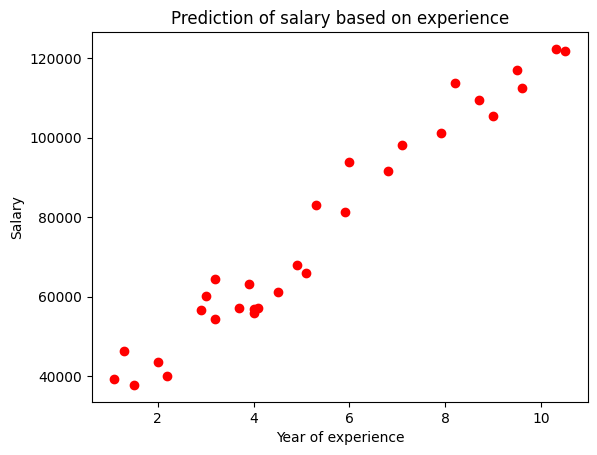

In [10]:
plt.scatter(x,y,color='r')
plt.xlabel('Year of experience')
plt.ylabel('Salary')
plt.title('Prediction of salary based on experience')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

Print a data frame

Actual value, predicted value, difference

In [13]:
df1=pd.DataFrame({'Actaul_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df1

,Actaul_Value,Predicted_Value,Difference
27,112635.0,115573.622884,-2938.622884
15,67938.0,71679.938782,-3741.938782
23,113812.0,102498.908470,11313.091530
17,83088.0,75415.571471,7672.428529
8,64445.0,55803.499851,8641.500149
9,57189.0,60473.040713,-3284.040713
28,122391.0,122110.980090,280.019910
24,109431.0,107168.449332,2262.550668
12,56957.0,63274.765230,-6317.765230


In [14]:
# passing a value to predict randomly
print(model.predict([[5.8]])) # 5.8 years experience

[80085.11233302]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Experience vs Salary')

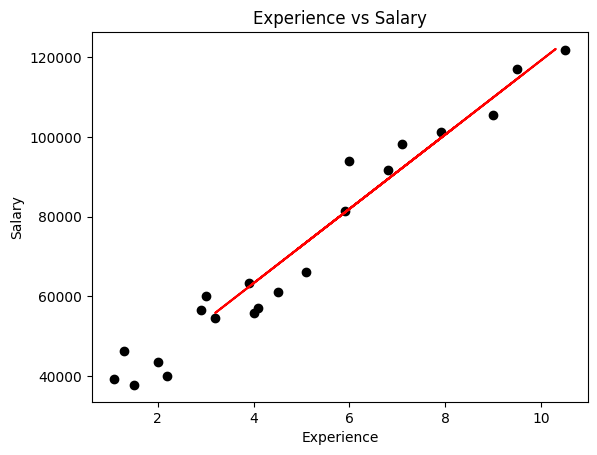

In [17]:
plt.scatter(x_train,y_train,color='k')
plt.plot(x_test,y_pred,color='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

In [18]:
# y=mx+c
print('Slope is : ',model.coef_)

Slope is :  [9339.08172382]


In [19]:
print('Y intercept / constatnt is : ',model.intercept_)

Y intercept / constatnt is :  25918.438334893202


## Performance Evaluation model for regression

1. **MAE          : Mean Absolute Error**
2. **MAPE        : Mean Absolute Percentage Error**
3. **MSE           : Mean Squared Error**
4. **RMSE         : Root Mean Squared Error**
5. **R2_Score  : Coefficience of determination**

In [20]:
from sklearn.metrics import mean_absolute_error
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  5161.328710400183


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred))
# 0.06 is MAPE which does not exceed 0.3 so its a good model

MAPE :  0.06647907533756252


In [22]:
from sklearn.metrics import mean_squared_error
print('MSE : ',mean_squared_error(y_test,y_pred))

MSE :  37784662.46621314


In [23]:
from sklearn.metrics import root_mean_squared_error
print('RMSE : ',root_mean_squared_error(y_test,y_pred))

RMSE :  6146.92300799458


In [24]:
from sklearn.metrics import r2_score
print('R2_score : ',r2_score(y_test,y_pred))
# 0.94 its a good model

R2_score :  0.9414466227178214
